In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df_partidos = pd.read_csv("partidos_cebollitas.csv")
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']

X = df_partidos[['posesion_local (%)', 'tiros_arco_local']]
y = df_partidos['diferencia_goles']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

modelo_rl = LinearRegression()
modelo_rl.fit(X_train, y_train)

y_pred = modelo_rl.predict(X_test)

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"R² (Coeficiente de Determinación): {r2:.2f}")

MSE (Error Cuadrático Medio): 4.96
RMSE (Raíz del Error Cuadrático Medio): 2.23
MAE (Error Absoluto Medio): 1.89
R² (Coeficiente de Determinación): -0.03


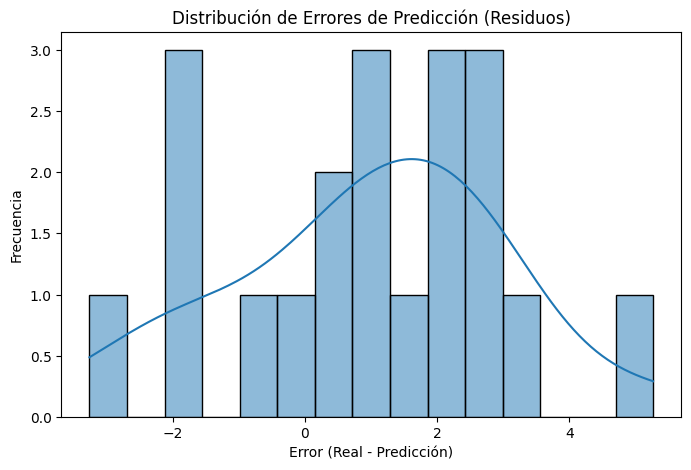

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(y_test - y_pred, bins=15, kde=True)
plt.title('Distribución de Errores de Predicción (Residuos)')
plt.xlabel('Error (Real - Predicción)')
plt.ylabel('Frecuencia')
plt.show()

In [4]:
import ipywidgets as widgets

def evaluar_predicciones(threshold_mae):
    calidad = "buena" if mae <= threshold_mae else "regular o mala"
    print(f"Tu modelo tiene una MAE de {mae:.2f}, considerada {calidad} (umbral definido: {threshold_mae}).")

umbral_widget = widgets.FloatSlider(min=0.1, max=5, step=0.1, value=1.0, description='Umbral MAE:')
widgets.interactive(evaluar_predicciones, threshold_mae=umbral_widget)

interactive(children=(FloatSlider(value=1.0, description='Umbral MAE:', max=5.0, min=0.1), Output()), _dom_cla…